
# Задание 1. Команда Iron Insruments


In [11]:
import pandas as pd
dfl = pd.read_csv('DataFromWebPage (1).csv', sep = ';', low_memory=False)

In [12]:
# Поиск чисел в строке

In [13]:
def find_number(data_list):
    out = []
    res = ''
    for x in data_list:
        if x != x:
            res = '0'
        elif x == '':
            res = '0'
        else:
            for i in str(x):
                if ('0' <= i <= '9'):
                    res += i
        if res == '':
            res = '0'
        out.append(int(res))
        res = ''
    return out
        

In [14]:
# Очистка данных

In [15]:
dfc = dfl
labels = ['Price', 'OtMetro', 'Vmestimost', 'Area', 'Footprint']
in_list  = []
out_list = []
for label in labels:
    in_list  = dfl[label].values
    out_list = find_number(in_list)
    n = 0
    for x in out_list:
        dfc[label].values[n] = x
        n+=1 
    in_list  = []
    out_list = []

## Визуализация

In [16]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
init_notebook_mode ( connected = True )
MAX = 10

### График распределения лофтов по цене (первые 10 с самой низкой ценой аренды за час)

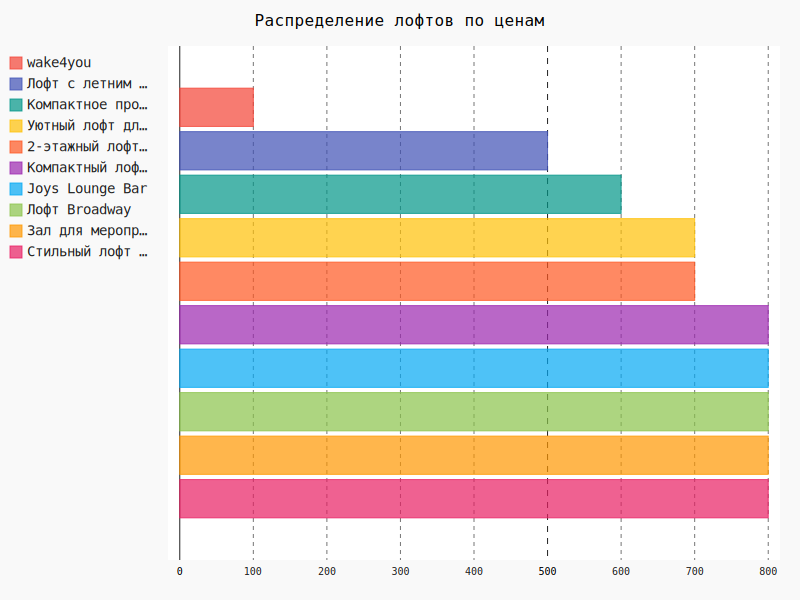

In [22]:
df_price = dfc[['Price', 'Name']]
df_price = df_price[df_price.Price != 0]
df_price = df_price.sort_values(by='Price')

#!pip install pygal
import pygal
line_chart = pygal.HorizontalBar()
line_chart.title = 'Распределение лофтов по ценам'
for i in list(range(MAX)):
    line_chart.add(df_price['Name'].values[i], df_price['Price'].values[i])    
#line_chart.render()
from IPython.display import SVG
display(SVG(line_chart.render()))
#SVG.show(line_chart.render())

### Время, за которое можно пешком добраться до лофта от метро

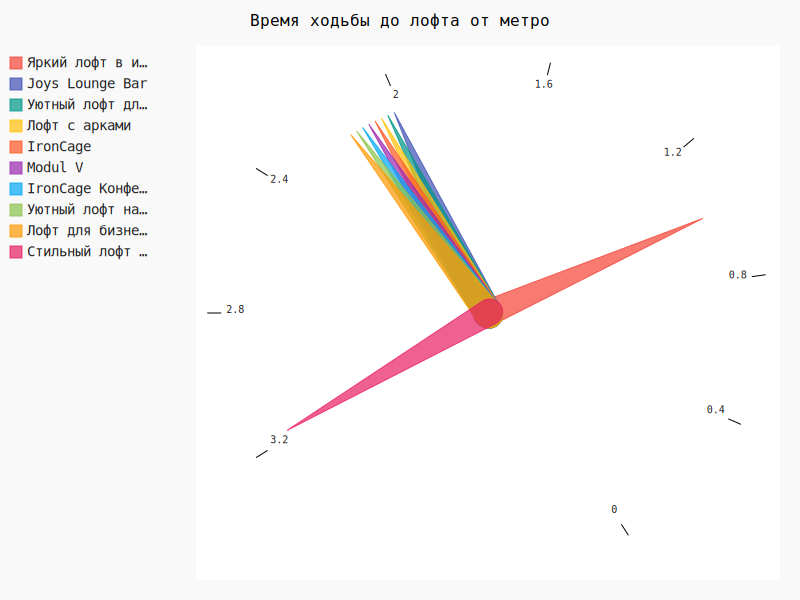

In [54]:
df_otmetro = dfc[['Name', 'OtMetro']]
df_otmetro = df_otmetro[df_otmetro.OtMetro != 0]
df_otmetro = df_otmetro.sort_values(by='OtMetro')

import pygal
#line_chart = pygal.HorizontalBar()
chart = pygal.Gauge(human_readable=True)
chart.range = [0, max(df_otmetro['OtMetro'].values[:MAX]+0.5)]
chart.title = 'Время ходьбы до лофта от метро'
i = 0
for i in list(range(MAX)):
    chart.add(df_otmetro['Name'].values[i], df_otmetro['OtMetro'].values[i]+0.02*i)
    i+=1
from IPython.display import SVG
display(SVG(chart.render()))


### Распределение по вместительности лофтов

In [24]:
df_vmest = dfc[['Name', 'Vmestimost']]
df_vmest = df_vmest[df_vmest.Vmestimost != 0]
df_vmest = df_vmest.sort_values(by='Vmestimost', ascending=False)


data = go.Bar(x=df_vmest['Name'].values[:MAX], y=df_vmest['Vmestimost'].values[:MAX])
layout = {'title': 'Вместительность'}
fig = go.Figure(data=[data], layout=layout)
iplot(fig)

### Распределение по максимальной площади лофта

In [25]:
df_area = dfc[['Name', 'Area']]
df_area = df_area[df_area.Area != 0]
df_area = df_area.sort_values(by='Area', ascending=False)


data = go.Pie(labels=df_area['Name'].values[:MAX], values=df_area['Area'].values[:MAX])
layout = {'title': 'Распределение по площади'}
fig = go.Figure(data=[data], layout=layout)
iplot(fig)

### Количество мест для сидения в лофте

In [26]:
df_foot = dfc[['Name', 'Footprint']]
df_foot = df_foot[df_foot.Footprint != 0]
df_foot = df_foot.sort_values(by='Footprint', ascending=False)


data = go.Pie(labels=df_foot['Name'].values[:MAX], values=df_foot['Footprint'].values[:MAX])
layout = {'title': 'Востребованность языков программирования среди работодателей'}
fig = go.Figure(data=[data], layout=layout)
iplot(fig)

### Выбор оптимального лофта

In [27]:
d = dict()
for name in dfl['Name']:
    d[name] = 0

names = df_price['Name'].tolist()
names.reverse()
i = 0
for name in names:
    d[name] = d[name] + 0.1*i
    i += 1

names = df_otmetro['Name'].tolist()
names.reverse()
i = 0
for name in names:
    d[name] = d[name] + 1*i
    i += 1

    
names = df_vmest['Name'].tolist()
names.reverse()
i = 0
for name in names:
    d[name] = d[name] + 3*i
    i += 1

    
names = df_area['Name'].tolist()
names.reverse()
i = 0
for name in names:
    d[name] = d[name] + 3*i
    i += 1

names = df_foot['Name'].tolist()
names.reverse()
i = 0
for name in names:
    d[name] = d[name] + 0.5*i
    i += 1

In [28]:
max_mark = max(d.values())
print(max_mark)
for k in d.keys():
    if d[k] == max_mark:
        lider = k
print(lider)

1009.6
Мультимедийный зал на Флаконе


In [29]:
lider_index = dfl['Name'].tolist().index(lider)
print(lider_index)

94


In [34]:
dd = dfl.loc[dfl['Name'].str.find(lider) != -1]
dd.head()

,Price,Metro,Name,Vmestimost,Area,Footprint,OtMetro
94,14000,Дмитровская,Мультимедийный зал на Флаконе,500,7002,300,3
